<a href="https://colab.research.google.com/github/engrsmukhtar/AI4EnergyProcessSystems/blob/AI4EPS-1/AI%20Models/model2/PyTorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Carbon Capture and Release with Neural Networks
In this notebook, we predict carbon capture and release through the conversion of CO2

In [0]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame

url="https://raw.githubusercontent.com/engrsmukhtar/AI4EnergyProcessSystems/AI4EPS-1/AI%20Models/Model%201/rankprediction/tot%20mass%20w%20H2O%20-hbrcacabo3%20-%20duration.csv"
data = pd.read_csv(url)

# Printing out some rows from our data
data[:3]

,Duration,HBr_CaC03_mass_(g),Calciner temp [C],Calciner Heater kW,Calciner Pressure ( Pa ),Calciner velocity (m/s),Calciner O2 in(perc-vol),Calciner N2 in(perc-vol),Calciner top temp ( C ),Calciner CO2 out(perc),...,Run status,Carbonator bottom temp (C),Carbonator mid temp (C),Carbonator press (pa),Carbonator velocity (m/s),Carbonator inlet CO2 (vol),Carbonator inlet N2 (vol),Carbonator outlet CO2 (vol),Carbonator top temp (C),Rank
0,1.0,4200,632.75,7.8,3216.0,0.32,40,60,450.680,0.406479,...,0,446.905,560.105,2680.0,2.5,0,100,0.0714,529.81,1
1,2.0,4200,634.72,7.8,3190.5,0.32,40,60,451.165,0.372648,...,0,446.200,558.915,2905.5,2.5,0,100,-0.1666,529.27,1
2,3.0,4200,636.50,7.8,3191.5,0.32,40,60,451.365,0.358011,...,0,445.035,558.565,2912.5,2.5,0,100,-0.2023,529.06,1


## Plotting the data

a plot of our data to see how it looks.

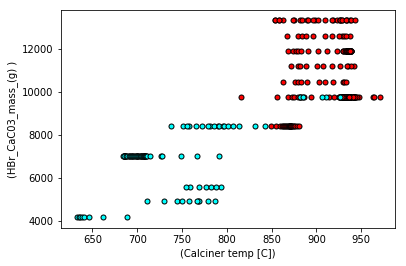

In [0]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to help us plot
def plot_points(data):
    X = np.array(data[["Calciner temp [C]","HBr_CaC03_mass_(g) "]])
    y = np.array(data["Rank"])
    cal = X[np.argwhere(y<=3)]
    cc = X[np.argwhere(y>3)]
    plt.scatter([s[0][0] for s in cc], [s[0][1] for s in cc], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in cal], [s[0][1] for s in cal], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('(Calciner temp [C])')
    plt.ylabel('(HBr_CaC03_mass_(g) )')
    
# Plotting the points
plot_points(data)
plt.show()



## One-hot encoding the rank
processing the rank data

In [0]:
# Dummy variables for rank and concat existing columns
one_hot_data = pd.concat([data, pd.get_dummies(data['Run status'], prefix='Run status')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop(['Duration', 'Run status'], axis=1)
# one_hot_data = one_hot_data.drop('Calciner_CO2_in', axis=1)

# Print the first 10 rows of our data
one_hot_data[:2]

,HBr_CaC03_mass_(g),Calciner temp [C],Calciner Heater kW,Calciner Pressure ( Pa ),Calciner velocity (m/s),Calciner O2 in(perc-vol),Calciner N2 in(perc-vol),Calciner top temp ( C ),Calciner CO2 out(perc),Calciner O2 out(perc),...,Carbonator mid temp (C),Carbonator press (pa),Carbonator velocity (m/s),Carbonator inlet CO2 (vol),Carbonator inlet N2 (vol),Carbonator outlet CO2 (vol),Carbonator top temp (C),Rank,Run status_0,Run status_1
0,4200,632.75,7.8,3216.0,0.32,40,60,450.680,0.406479,4.078414,...,560.105,2680.0,2.5,0,100,0.0714,529.81,1,1,0
1,4200,634.72,7.8,3190.5,0.32,40,60,451.165,0.372648,12.279849,...,558.915,2905.5,2.5,0,100,-0.1666,529.27,1,1,0


## Scaling the data
By dividing Each Column with it's max value

In [0]:
# Making a copy of our data
processed_data = one_hot_data[:]

# Scale the columns

col = processed_data.head()
clmn = list(col) 

for c in clmn: 
    # element of column 
    processed_data[c]  = processed_data[c]/processed_data[c].max()
print(clmn) # just to see if the list of columns are currect

# Printing the first 10 rows of our procesed data
processed_data[:2]

['HBr_CaC03_mass_(g) ', 'Calciner temp [C]', 'Calciner Heater kW', 'Calciner Pressure ( Pa )', 'Calciner  velocity (m/s)', 'Calciner O2 in(perc-vol)', 'Calciner N2 in(perc-vol)', 'Calciner top temp ( C )', 'Calciner CO2 out(perc)', 'Calciner O2 out(perc)', 'Calciner H2O out(perc)', 'Calciner CO out(ppm)', 'Calciner CH4 out(ppm)', 'Carbonator bottom temp (C)', 'Carbonator mid temp (C)', 'Carbonator press (pa)', 'Carbonator velocity (m/s)', 'Carbonator inlet CO2 (vol)', 'Carbonator inlet N2 (vol)', 'Carbonator outlet CO2 (vol)', 'Carbonator top temp (C)', 'Rank', 'Run status_0', 'Run status_1']


,HBr_CaC03_mass_(g),Calciner temp [C],Calciner Heater kW,Calciner Pressure ( Pa ),Calciner velocity (m/s),Calciner O2 in(perc-vol),Calciner N2 in(perc-vol),Calciner top temp ( C ),Calciner CO2 out(perc),Calciner O2 out(perc),...,Carbonator mid temp (C),Carbonator press (pa),Carbonator velocity (m/s),Carbonator inlet CO2 (vol),Carbonator inlet N2 (vol),Carbonator outlet CO2 (vol),Carbonator top temp (C),Rank,Run status_0,Run status_1
0,0.315008,0.651514,0.371429,0.800498,0.8,0.4,1.0,0.508467,0.010167,0.173908,...,0.813793,0.300533,1.0,0.0,1.0,0.003597,0.768052,0.166667,1.0,0.0
1,0.315008,0.653542,0.371429,0.794151,0.8,0.4,1.0,0.509014,0.009321,0.523627,...,0.812064,0.325820,1.0,0.0,1.0,-0.008393,0.767269,0.166667,1.0,0.0


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [0]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:2])
print(test_data[:2])

Number of training samples is 301
Number of testing samples is 34
     HBr_CaC03_mass_(g)   Calciner temp [C]  Calciner Heater kW  \
329             1.000000           0.879036                 1.0   
33              0.527563           0.710873                 0.0   

     Calciner Pressure ( Pa )  Calciner  velocity (m/s)  \
329                  0.792408                       1.0   
33                   0.968015                       0.0   

     Calciner O2 in(perc-vol)  Calciner N2 in(perc-vol)  \
329                       1.0                       0.0   
33                        0.0                       0.0   

     Calciner top temp ( C )  Calciner CO2 out(perc)  Calciner O2 out(perc)  \
329                 0.984267                0.887129               0.351513   
33                  0.604338                0.020583               0.627676   

         ...       Carbonator mid temp (C)  Carbonator press (pa)  \
329      ...                      0.999426               0.727502   


## Splitting the data into features and targets (labels)
 split the data into features (X) and targets (y).

In [0]:
features = train_data.drop(['Rank'], axis=1)
targets = train_data['Rank']
features_test = test_data.drop(['Rank'], axis=1)
targets_test = test_data['Rank']

print(features[:2])
print(targets[:2])

     HBr_CaC03_mass_(g)   Calciner temp [C]  Calciner Heater kW  \
329             1.000000           0.879036                 1.0   
33              0.527563           0.710873                 0.0   

     Calciner Pressure ( Pa )  Calciner  velocity (m/s)  \
329                  0.792408                       1.0   
33                   0.968015                       0.0   

     Calciner O2 in(perc-vol)  Calciner N2 in(perc-vol)  \
329                       1.0                       0.0   
33                        0.0                       0.0   

     Calciner top temp ( C )  Calciner CO2 out(perc)  Calciner O2 out(perc)  \
329                 0.984267                0.887129               0.351513   
33                  0.604338                0.020583               0.627676   

         ...       Carbonator bottom temp (C)  Carbonator mid temp (C)  \
329      ...                         1.000000                 0.999426   
33       ...                         0.700632           

## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Backpropagating the error
The error term is given by the equation:

$$ (y-\hat{y}) \sigma'(x) $$

In [0]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
  
    return (y - output)*sigmoid_prime(x)

In [0]:
# Neural Network hyperparameters
epochs = 5000
learnrate = 0.2

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.20481498002434767
Epoch: 500
Train loss:  0.014242868656184756
Epoch: 1000
Train loss:  0.01010375641101326
Epoch: 1500
Train loss:  0.008482220227130305
Epoch: 2000
Train loss:  0.007633558797949578
Epoch: 2500
Train loss:  0.007109327359538324
Epoch: 3000
Train loss:  0.00674414251114273
Epoch: 3500
Train loss:  0.006466859186949835
Epoch: 4000
Train loss:  0.00624313846085275
Epoch: 4500
Train loss:  0.00605479889687456
Finished training!


## Calculating the Accuracy on the Test Data

In [0]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
#test_out = sigmoid(np.dot(features, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
#accuracy = np.mean(predictions == targets)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.235
